In [ ]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

## 242 chords ET

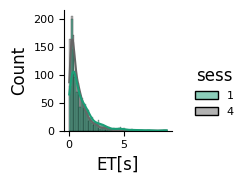

In [237]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC1/analysis/efc1_all.tsv')
D['ET'] = D['ET'].astype('float64')/1000
D = D[((D.sess==1) | (D.sess==4)) & (D.trialCorr==1)]
sn_list = D.sn.unique()

plt.rcParams.update({
    'font.size': 12,                 # Default text size
    'axes.titlesize': 12,            # Title size
    'axes.labelsize': 12,            # Axis label size
    'xtick.labelsize': 8,           # X-tick label size
    'ytick.labelsize': 8,           # Y-tick label size
    'legend.fontsize': 8,           # Legend font size
    'figure.titlesize': 12           # Figure title size
})

cmap = plt.get_cmap('Dark2')
for i, sn in enumerate(sn_list):
    # select subject data:
    D_sn = D[(D.sn == sn)]
    # sns.displot(data=D_sn, x="ET", hue="day", kind="hist")
    sns.displot(data=D_sn, x="ET", hue="sess", kde=True, height=2, palette=[mcolors.to_hex(cmap(0)), mcolors.to_hex(cmap(7))])
    plt.xlabel('ET[s]')
    plt.savefig(f'/Users/alighavampour/Desktop/Projects/EFC1/figures/efc1_{sn}_ET.pdf', bbox_inches='tight')
    if i != 0:
        plt.close()

## Chord-specific learning MD

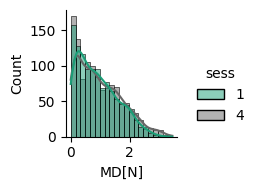

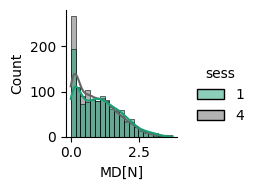

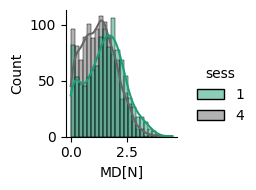

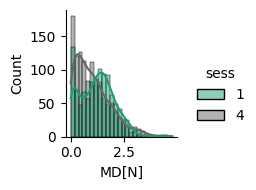

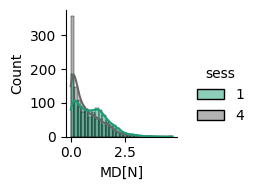

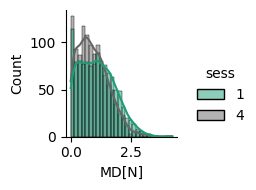

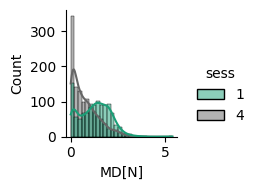

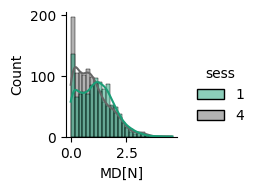

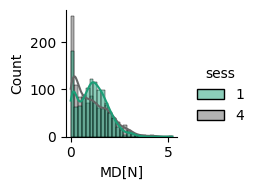

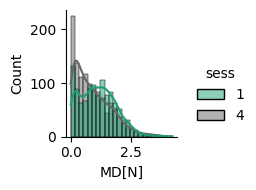

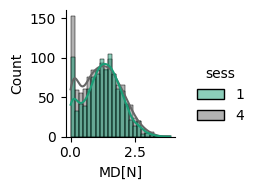

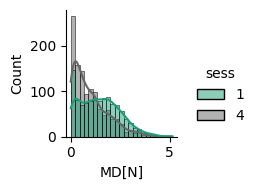

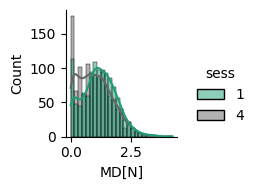

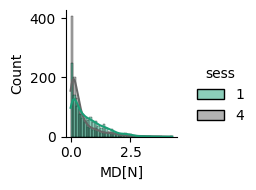

In [70]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC1/analysis/efc1_all.tsv')
D['MD'] = D['MD'].astype('float64')
D = D[((D.sess==1) | (D.sess==4)) & (D.trialCorr==1)]
sn_list = D.sn.unique()

cmap = plt.get_cmap('Dark2')
for i, sn in enumerate(sn_list):
    # select subject data:
    D_sn = D[(D.sn == sn)]
    # sns.displot(data=D_sn, x="ET", hue="day", kind="hist")
    sns.displot(data=D_sn, x="MD", hue="sess", kde=True, height=2, palette=[mcolors.to_hex(cmap(0)), mcolors.to_hex(cmap(7))])
    plt.xlabel('MD[N]')
    plt.savefig(f'/Users/alighavampour/Desktop/Projects/EFC1/figures/efc1_{sn}_MD.pdf')

## Chord-specific learning ET

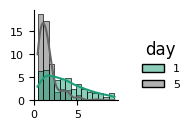

In [256]:
# load the data:
D = pd.read_csv('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc2_all.csv')
D['ET'] = D['ET']/1000
D = D[(D.trained==1) & ((D.day==1) | (D.day==5)) & (D.trial_correct==1)]
sn_list = D.sn.unique()

plt.rcParams.update({
    'font.size': 12,                 # Default text size
    'axes.titlesize': 12,            # Title size
    'axes.labelsize': 12,            # Axis label size
    'xtick.labelsize': 8,           # X-tick label size
    'ytick.labelsize': 8,           # Y-tick label size
    'legend.fontsize': 8,           # Legend font size
    'figure.titlesize': 12           # Figure title size
})

cmap = plt.get_cmap('Dark2')
for i, sn in enumerate(sn_list):
    # select subject data:
    D_sn = D[(D.sn == sn)]

    sns.displot(data=D_sn, x="ET", hue="day", kde=True, stat='percent', height=1.7, aspect=1, palette=[mcolors.to_hex(cmap(0)), mcolors.to_hex(cmap(7))], legend=True)
    plt.xlabel('')
    plt.ylabel('')

    plt.savefig(f'/Users/alighavampour/Desktop/Projects/EFC1/figures/efc2_ET_{sn}.pdf', bbox_inches='tight')
    if i != 0:
        plt.close()

## Chord-specific learning MD

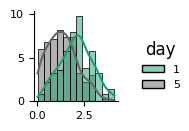

In [257]:
# load the data:
D = pd.read_csv('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc2_all.csv')
D = D[(D.trained==1) & ((D.day==1) | (D.day==5)) & (D.trial_correct==1)]
sn_list = D.sn.unique()

plt.rcParams.update({
    'font.size': 12,                 # Default text size
    'axes.titlesize': 12,            # Title size
    'axes.labelsize': 12,            # Axis label size
    'xtick.labelsize': 8,           # X-tick label size
    'ytick.labelsize': 8,           # Y-tick label size
    'legend.fontsize': 8,           # Legend font size
    'figure.titlesize': 12           # Figure title size
})

cmap = plt.get_cmap('Dark2')
for i, sn in enumerate(sn_list):
    # select subject data:
    D_sn = D[(D.sn == sn)]
    sns.displot(data=D_sn, x="MD", hue="day", kde=True, stat='percent', height=1.7, aspect=1, palette=[mcolors.to_hex(cmap(0)), mcolors.to_hex(cmap(7))], legend=True)
    plt.xlabel('')
    plt.ylabel('')
    
    plt.savefig(f'/Users/alighavampour/Desktop/Projects/EFC1/figures/efc2_MD_{sn}.pdf', bbox_inches='tight')
    if i != 0:
        plt.close()

## ET corr MD

/var/folders/5y/1pn48fgn7yb77gc17h_5jms80000gp/T/ipykernel_73330/2619569742.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])


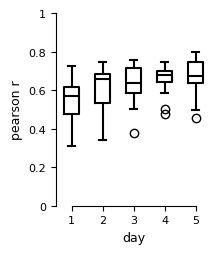

In [264]:
# load the data:
D = pd.read_csv('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc2_all.csv')
D = D[D.trial_correct==1]
D['ET'] = D['ET']/1000
sn_list = D['sn'].unique()
days = D['day'].unique()

df = pd.DataFrame(columns=['sn','rho','day','pval','chords'])
rho_vec = []
p_vec = []
sn_vec = []
day_vec = []
chord_vec = []
for sn in sn_list:
    for day in days:
            D_sn = D[(D['sn'] == sn) & (D['day'] == day)]
            x = D_sn['ET']
            y = D_sn['MD']
            r, p = pearsonr(x, y)
            rho_vec.append(r)
            p_vec.append(p)
            sn_vec.append(sn)
            day_vec.append(day)

df['sn'] = sn_vec
df['rho'] = rho_vec
df['day'] = day_vec
df['pval'] = p_vec

plt.rcParams.update({
    'font.size': 9,                 # Default text size
    'axes.titlesize': 9,            # Title size
    'axes.labelsize': 9,            # Axis label size
    'xtick.labelsize': 8,           # X-tick label size
    'ytick.labelsize': 8,           # Y-tick label size
    'legend.fontsize': 8,           # Legend font size
    'figure.titlesize': 9           # Figure title size
})

# box plot of correlation between ET and MD
fig, ax = plt.subplots(figsize=(2, 2.5))
sns.boxplot(data=df, x='day', y='rho', width=0.5, fill=False, linewidth=1.5, color='black')
plt.xlabel('day')
plt.ylabel('pearson r')
plt.ylim((0, 1))
ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])

xlim = ax.get_xlim()
ylim = ax.get_ylim()
sns.despine(ax=ax)
# Set the bounds of the remaining spines to match the data limits
ax.spines['left'].set_bounds(0, 1)
ax.spines['bottom'].set_bounds(0, 4)
plt.savefig('/Users/alighavampour/Desktop/Projects/EFC1/figures/efc2_corr.pdf', bbox_inches='tight')
plt.show()

## Scatter ET vs MD

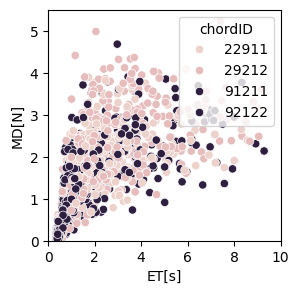

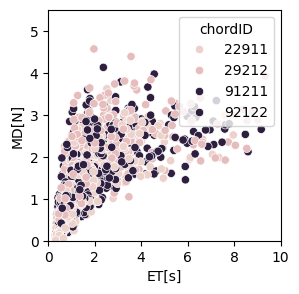

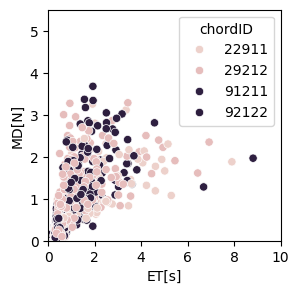

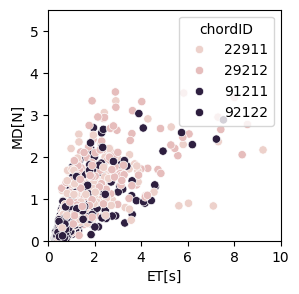

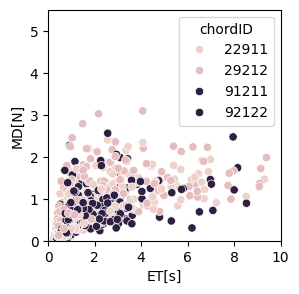

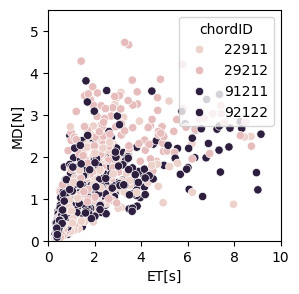

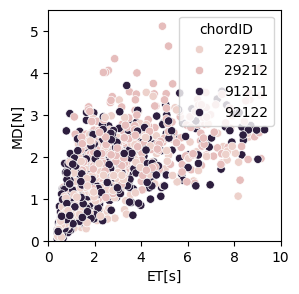

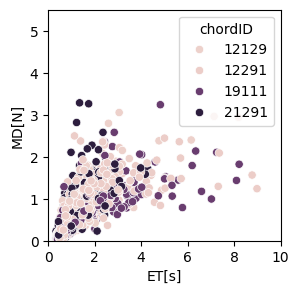

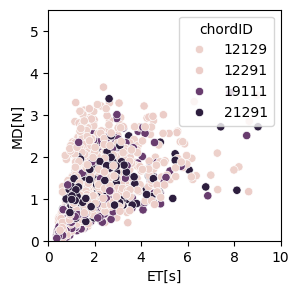

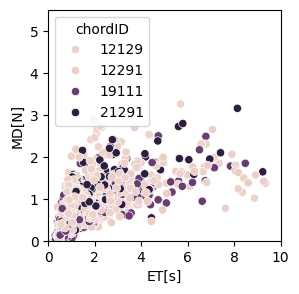

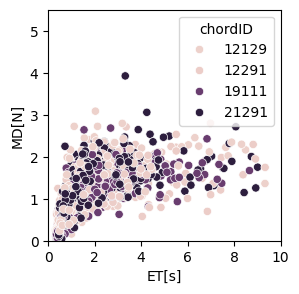

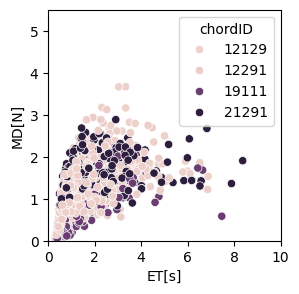

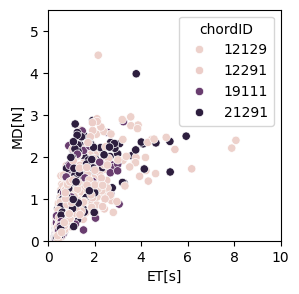

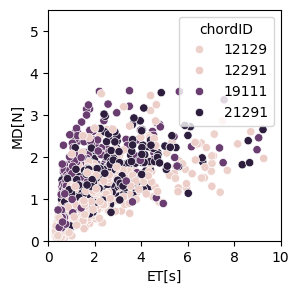

In [100]:
# load the data:
D = pd.read_csv('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc2_all.csv')
D['ET'] = D['ET']/1000
chords = D['chordID'].unique()

# select portion of data:
# D = D[(D.chordID == chords[0]) & (D.trial_correct==1)]
D = D[(D.trained == 1) & (D.trial_correct==1)]
sn_list = D.sn.unique()

cmap = plt.get_cmap('Dark2')
for i, sn in enumerate(sn_list):
    # select subject data:
    D_sn = D[(D.sn == sn)]
    # sns.displot(data=D_sn, x="ET", hue="day", kind="hist")
    ax, fig = plt.subplots(figsize=(3, 3))
    sns.scatterplot(data=D_sn, x="ET", y="MD", hue="chordID")
    plt.xlabel('ET[s]')
    plt.ylabel('MD[N]')
    plt.xlim((0, 10))
    plt.ylim((0, 5.5))
    plt.show()
    # plt.savefig(f'/Users/alighavampour/Desktop/Projects/EFC1/figures/efc2_{sn}_c.pdf')

## reaction time 242 chords

s1, median RT: 0.41s
s2, median RT: 0.55s
s3, median RT: 0.34s
s4, median RT: 0.47s
s5, median RT: 0.53s
s6, median RT: 0.34s
s7, median RT: 0.56s
s8, median RT: 0.72s
s9, median RT: 0.66s
s10, median RT: 0.39s
s11, median RT: 0.43s
s15, median RT: 0.48s
s16, median RT: 0.48s
s17, median RT: 0.37s
avg median RT: 0.48s


/var/folders/5y/1pn48fgn7yb77gc17h_5jms80000gp/T/ipykernel_73330/1222252245.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(len(sn_list))+1)


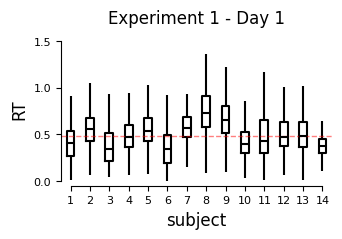

In [236]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc1_all.tsv')
D['RT'] = D['RT'].astype('float64')/1000
D = D.iloc[::5] # only look at first repetition
D = D[(D.trialCorr==1) & (D.sess==1)]
sn_list = D.sn.unique()

medians = []
for sn in sn_list:
    print(f's{sn}, median RT: {D[D.sn==sn].RT.median():.2f}s')
    medians.append(D[D.sn==sn].RT.median())
print(f'avg median RT: {np.mean(medians):.2f}s')

plt.rcParams.update({
    'font.size': 12,                 # Default text size
    'axes.titlesize': 12,            # Title size
    'axes.labelsize': 12,            # Axis label size
    'xtick.labelsize': 8,           # X-tick label size
    'ytick.labelsize': 8,           # Y-tick label size
    'legend.fontsize': 8,           # Legend font size
    'figure.titlesize': 12           # Figure title size
})

fig, ax = plt.subplots(figsize=(3.5, 2))
sns.boxplot(data=D, x='sn', y='RT', width=0.4, fill=False, linewidth=1.5, color='black', fliersize=0, showcaps=False)
plt.title('Experiment 1 - Day 1')
plt.xlabel('subject')
plt.ylim((-0.05,1.6))
ax.axhline(y=np.mean(medians), color='r', linestyle='--', linewidth=1, alpha=0.5, label='avg median')

ax.set_xticklabels(np.arange(len(sn_list))+1)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
sns.despine(ax=ax)
# Set the bounds of the remaining spines to match the data limits
ax.spines['left'].set_bounds(0, 1.5)
ax.spines['bottom'].set_bounds(0, len(sn_list)-1)
plt.savefig('/Users/alighavampour/Desktop/Projects/EFC1/figures/efc1_RT.pdf', bbox_inches='tight')
plt.show()

## Reaction time chord-specific

s100, median RT: 0.50s
s101, median RT: 0.45s
s102, median RT: 0.35s
s103, median RT: 0.38s
s104, median RT: 0.39s
s106, median RT: 0.45s
s107, median RT: 0.52s
s108, median RT: 0.45s
s109, median RT: 0.55s
s110, median RT: 0.40s
s111, median RT: 0.56s
s112, median RT: 0.55s
s113, median RT: 0.34s
s114, median RT: 0.50s
avg median RT: 0.46s


/var/folders/5y/1pn48fgn7yb77gc17h_5jms80000gp/T/ipykernel_73330/1371447578.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(len(sn_list))+1)


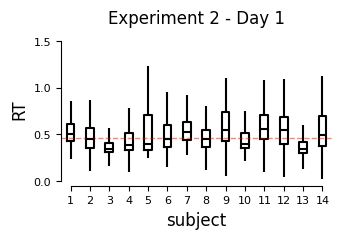

In [235]:
# load the data:
D = pd.read_csv('/Users/alighavampour/Desktop/Projects/EFC2/analysis/efc2_all.csv')
D['RT'] = D['RT'].astype('float64')/1000
D = D[(D.trial_correct==1) & (D.day==1)]
sn_list = D.sn.unique()

medians = []
for sn in sn_list:
    print(f's{sn}, median RT: {D[D.sn==sn].RT.median():.2f}s')
    medians.append(D[D.sn==sn].RT.median())
print(f'avg median RT: {np.mean(medians):.2f}s')

plt.rcParams.update({
    'font.size': 12,                 # Default text size
    'axes.titlesize': 12,            # Title size
    'axes.labelsize': 12,            # Axis label size
    'xtick.labelsize': 8,           # X-tick label size
    'ytick.labelsize': 8,           # Y-tick label size
    'legend.fontsize': 8,           # Legend font size
    'figure.titlesize': 12           # Figure title size
})

fig, ax = plt.subplots(figsize=(3.5, 2))
sns.boxplot(data=D, x='sn', y='RT', width=0.4, fill=False, linewidth=1.5, color='black', fliersize=0, showcaps=False)
plt.title('Experiment 2 - Day 1')
plt.xlabel('subject')
plt.ylim((-0.05,1.6))
ax.axhline(y=np.mean(medians), color='r', linestyle='--', linewidth=1, alpha=0.5, label='avg median')

ax.set_xticklabels(np.arange(len(sn_list))+1)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
sns.despine(ax=ax)
# Set the bounds of the remaining spines to match the data limits
ax.spines['left'].set_bounds(0, 1.5)
ax.spines['bottom'].set_bounds(0, len(sn_list)-1)
plt.savefig('/Users/alighavampour/Desktop/Projects/EFC1/figures/efc2_RT.pdf', bbox_inches='tight')
plt.show()

## EFC1 Reliability

### cross-validated group correlation

/var/folders/5y/1pn48fgn7yb77gc17h_5jms80000gp/T/ipykernel_73330/3298570309.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,2,3,4])


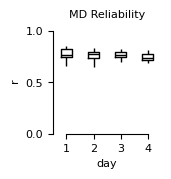

In [319]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC1/analysis/efc1_chord.tsv')
D['MD'] = D['MD'].astype('float64')
D['ET'] = D['ET'].astype('float64')
# days = D['sess'].unique()
sn_list = D.sn.unique()

day_vec = []
sn_vec = []
r = []
# loop on participants:
for sn in sn_list:
    # loop on days:
    for day in [1,2,3,4]:
        D_sn = D[(D.sn == sn) & (D.sess == day)]
        
        # Get the MD values for this subject and day, grouped by chordID
        subject_md = D_sn.groupby('chordID')['MD'].mean().values.flatten()
        
        # Get MD values for all other subjects on the same day
        D_not_sn = D[(D.sn != sn) & (D.sess == day)]
        group_mean = D_not_sn.groupby('chordID')['MD'].mean().values.flatten()

        nas = np.logical_or(np.isnan(subject_md), np.isnan(group_mean))
        subject_md = subject_md[~nas]
        group_mean = group_mean[~nas]
        
        # Now both series have the same index in the same order
        r.append(pearsonr(subject_md, group_mean)[0])
        day_vec.append(day)
        sn_vec.append(sn)

df = pd.DataFrame(columns=['sn','r','day'])
df['sn'] = sn_vec
df['r'] = r
df['day'] = day_vec

# box plot correlations:
plt.rcParams.update({
    'font.size': 8,                 # Default text size
    'axes.titlesize': 8,            # Title size
    'axes.labelsize': 8,            # Axis label size
    'xtick.labelsize': 8,           # X-tick label size
    'ytick.labelsize': 8,           # Y-tick label size
    'legend.fontsize': 8,           # Legend font size
    'figure.titlesize': 8           # Figure title size
})

fig, ax = plt.subplots(figsize=(1.4, 1.4))
sns.boxplot(data=df, x='day', y='r', width=0.4, fill=False, linewidth=1, color='black', fliersize=0, showcaps=False)
plt.title('MD Reliability')
plt.xlabel('day')
plt.ylim((0,1.05))
ax.set_xticklabels([1,2,3,4])

xlim = ax.get_xlim()
ylim = ax.get_ylim()
sns.despine(ax=ax)
# Set the bounds of the remaining spines to match the data limits
ax.spines['left'].set_bounds(0, 1)
ax.spines['bottom'].set_bounds(0,3)
plt.savefig('/Users/alighavampour/Desktop/Projects/EFC1/figures/efc1_MD_reliability.pdf', bbox_inches='tight')
plt.show()

### pariwise subject correlation

/var/folders/5y/1pn48fgn7yb77gc17h_5jms80000gp/T/ipykernel_73330/3763914209.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,2,3,4])


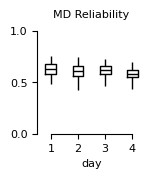

In [386]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC1/analysis/efc1_chord.tsv')
D['MD'] = D['MD'].astype('float64')
D['ET'] = D['ET'].astype('float64')
# days = D['sess'].unique()
sn_list = D.sn.unique()

r_vec = []
day_vec = []
for day in [1,2,3,4]:
    data = []
    for sn in sn_list:
        D_sn = D[(D.sn == sn) & (D.sess == day)]

        # Get the MD values for this subject and day, grouped by chordID
        subject_md = D_sn.groupby('chordID')['MD'].mean().values.flatten()

        data.append(subject_md)
    data = np.column_stack(data)
    df = pd.DataFrame(data)
    correlation_matrix = df.corr().to_numpy()

    # get the upper triangle of the correlation matrix:
    correlation_vec = correlation_matrix[np.triu_indices(np.shape(correlation_matrix)[0], k=1)]
    r_vec.extend(correlation_vec)
    day_vec.extend(np.repeat(day, len(correlation_vec)))

# box plot
plt.rcParams.update({
    'font.size': 8,                 # Default text size
    'axes.titlesize': 8,            # Title size
    'axes.labelsize': 8,            # Axis label size
    'xtick.labelsize': 8,           # X-tick label size
    'ytick.labelsize': 8,           # Y-tick label size
    'legend.fontsize': 8,           # Legend font size
    'figure.titlesize': 8           # Figure title size
})

fig, ax = plt.subplots(figsize=(1.4, 1.4))
sns.boxplot(x=day_vec, y=r_vec, width=0.4, fill=False, linewidth=1, color='black', fliersize=0, showcaps=False)
plt.title('MD Reliability')
plt.xlabel('day')
plt.ylim((0,1.05))
ax.set_xticklabels([1,2,3,4])

xlim = ax.get_xlim()
ylim = ax.get_ylim()
sns.despine(ax=ax)
# Set the bounds of the remaining spines to match the data limits
ax.spines['left'].set_bounds(0, 1)
ax.spines['bottom'].set_bounds(0,3)
plt.savefig('/Users/alighavampour/Desktop/Projects/EFC1/figures/efc1_MD_reliability.pdf', bbox_inches='tight')
plt.show()

/var/folders/5y/1pn48fgn7yb77gc17h_5jms80000gp/T/ipykernel_73330/2447946588.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1,2,3,4])


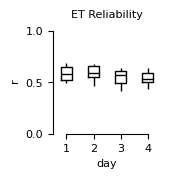

In [320]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC1/analysis/efc1_chord.tsv')
D['MD'] = D['MD'].astype('float64')
D['ET'] = D['ET'].astype('float64')
# days = D['sess'].unique()
sn_list = D.sn.unique()

day_vec = []
sn_vec = []
r = []
# loop on participants:
for sn in sn_list:
    # loop on days:
    for day in [1,2,3,4]:
        D_sn = D[(D.sn == sn) & (D.sess == day)]
        
        # Get the ET values for this subject and day, grouped by chordID
        subject_md = D_sn.groupby('chordID')['ET'].mean().values.flatten()
        
        # Get ET values for all other subjects on the same day
        D_not_sn = D[(D.sn != sn) & (D.sess == day)]
        group_mean = D_not_sn.groupby('chordID')['ET'].mean().values.flatten()
        
        nas = np.logical_or(np.isnan(subject_md), np.isnan(group_mean))
        subject_md = subject_md[~nas]
        group_mean = group_mean[~nas]

        # Now both series have the same index in the same order
        r.append(pearsonr(subject_md, group_mean)[0])
        day_vec.append(day)
        sn_vec.append(sn)

df = pd.DataFrame(columns=['sn','r','day'])
df['sn'] = sn_vec
df['r'] = r
df['day'] = day_vec

# box plot correlations:
plt.rcParams.update({
    'font.size': 8,                 # Default text size
    'axes.titlesize': 8,            # Title size
    'axes.labelsize': 8,            # Axis label size
    'xtick.labelsize': 8,           # X-tick label size
    'ytick.labelsize': 8,           # Y-tick label size
    'legend.fontsize': 8,           # Legend font size
    'figure.titlesize': 8           # Figure title size
})

fig, ax = plt.subplots(figsize=(1.4, 1.4))
sns.boxplot(data=df, x='day', y='r', width=0.4, fill=False, linewidth=1, color='black', fliersize=0, showcaps=False)
plt.title('ET Reliability')
plt.xlabel('day')
plt.ylim((0,1.05))
ax.set_xticklabels([1,2,3,4])

xlim = ax.get_xlim()
ylim = ax.get_ylim()
sns.despine(ax=ax)
# Set the bounds of the remaining spines to match the data limits
ax.spines['left'].set_bounds(0, 1)
ax.spines['bottom'].set_bounds(0,3)
plt.savefig('/Users/alighavampour/Desktop/Projects/EFC1/figures/efc1_ET_reliability.pdf', bbox_inches='tight')
plt.show()

## Experiment 3 reliability

In [330]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC_natChord/analysis/natChord_chord.tsv')
D['MD'] = D['MD'].astype('float64')
D['ET'] = D['MT'].astype('float64') + D['RT'].astype('float64')
# days = D['sess'].unique()
sn_list = D.sn.unique()

day_vec = []
sn_vec = []
r = []
# loop on participants:
for sn in sn_list:
    # loop on days:
    for day in [1]:
        D_sn = D[(D.sn == sn) & (D.sess == day)]
        
        # Get the MD values for this subject and day, grouped by chordID
        subject_md = D_sn.groupby('chordID')['MD'].mean().values.flatten()
        
        # Get MD values for all other subjects on the same day
        D_not_sn = D[(D.sn != sn) & (D.sess == day)]
        group_mean = D_not_sn.groupby('chordID')['MD'].mean().values.flatten()

        nas = np.logical_or(np.isnan(subject_md), np.isnan(group_mean))
        subject_md = subject_md[~nas]
        group_mean = group_mean[~nas]
        
        # Now both series have the same index in the same order
        r.append(pearsonr(subject_md, group_mean)[0])
        day_vec.append(day)
        sn_vec.append(sn)

df = pd.DataFrame(columns=['sn','r','day'])
df['sn'] = sn_vec
df['r'] = r
df['day'] = day_vec

# avg correlation:
print(f'MD avg correlation: {np.mean(r):.2f}')
print(f'MD sem correlation: {np.std(r)/np.sqrt(len(r)):.2f}, len(r): {len(r)}')


MD avg correlation: 0.86
MD sem correlation: 0.01, len(r): 10


In [332]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC_natChord/analysis/natChord_chord.tsv')
D['MD'] = D['MD'].astype('float64')
D['ET'] = D['MT'].astype('float64') + D['RT'].astype('float64')
# days = D['sess'].unique()
sn_list = D.sn.unique()

day_vec = []
sn_vec = []
r = []
# loop on participants:
for sn in sn_list:
    # loop on days:
    for day in [1]:
        D_sn = D[(D.sn == sn) & (D.sess == day)]
        
        # Get the Et values for this subject and day, grouped by chordID
        subject_md = D_sn.groupby('chordID')['ET'].mean().values.flatten()
        
        # Get Et values for all other subjects on the same day
        D_not_sn = D[(D.sn != sn) & (D.sess == day)]
        group_mean = D_not_sn.groupby('chordID')['ET'].mean().values.flatten()

        nas = np.logical_or(np.isnan(subject_md), np.isnan(group_mean))
        subject_md = subject_md[~nas]
        group_mean = group_mean[~nas]
        
        # Now both series have the same index in the same order
        r.append(pearsonr(subject_md, group_mean)[0])
        day_vec.append(day)
        sn_vec.append(sn)

df = pd.DataFrame(columns=['sn','r','day'])
df['sn'] = sn_vec
df['r'] = r
df['day'] = day_vec

# avg correlation:
print(f'ET avg correlation: {np.mean(r):.2f}')
print(f'ET sem correlation: {np.std(r)/np.sqrt(len(r)):.2f}, len(r): {len(r)}')


ET avg correlation: 0.69
ET sem correlation: 0.01, len(r): 10


## Sex differences

### Experiment 1

MD, sess1, t=-0.39, p=0.70
ET, sess1, t=-1.15, p=0.27
MD, sess2, t=0.03, p=0.98
ET, sess2, t=-0.98, p=0.34
MD, sess3, t=-0.01, p=0.99
ET, sess3, t=-1.16, p=0.27
MD, sess4, t=0.03, p=0.98
ET, sess4, t=-1.00, p=0.34


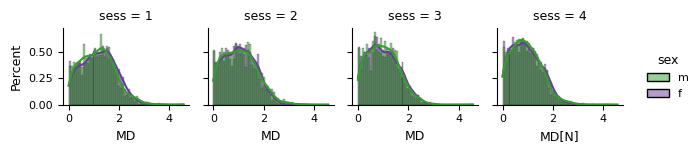

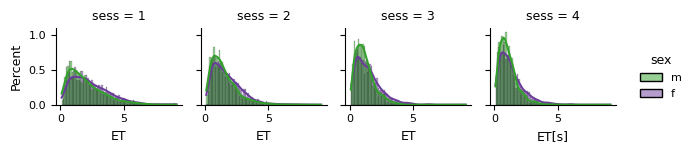

In [372]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC1/analysis/efc1_chord.tsv')
D['MD'] = D['MD'].astype('float64')
D['ET'] = D['ET'].astype('float64')/1000

sn_list = D.sn.unique()
male = [1,2,4,5,9,10,15]
female = [3,6,7,8,11,16,17]

D['sex'] = np.where(D['sn'].isin(female), 'f', 'm')

# distribution plot male vs female:
plt.rcParams.update({
    'font.size': 9,                 # Default text size
    'axes.titlesize': 9,            # Title size
    'axes.labelsize': 9,            # Axis label size
    'xtick.labelsize': 8,           # X-tick label size
    'ytick.labelsize': 8,           # Y-tick label size
    'legend.fontsize': 8,           # Legend font size
    'figure.titlesize': 9           # Figure title size
})

cmap = plt.get_cmap('Paired')
sns.displot(data=D, x="MD", hue="sex", col='sess', kde=True, stat='percent', height=1.6, palette=[mcolors.to_hex(cmap(3)), mcolors.to_hex(cmap(9))])
plt.xlabel('MD[N]')
plt.savefig(f'/Users/alighavampour/Desktop/Projects/EFC1/figures/efc1_MD_mf.pdf')

cmap = plt.get_cmap('Paired')
sns.displot(data=D, x="ET", hue="sex", col='sess', kde=True, stat='percent', height=1.6, palette=[mcolors.to_hex(cmap(3)), mcolors.to_hex(cmap(9))])
plt.xlabel('ET[s]')
plt.savefig(f'/Users/alighavampour/Desktop/Projects/EFC1/figures/efc1_ET_mf.pdf')

# average across chords:
df_gp = D.groupby(['sn','sess'], as_index=False).agg({
    'MD': 'mean',
    'ET': 'mean',
    'sex': 'first'
})
for sess in [1,2,3,4]:
    male_MD = df_gp['MD'][(df_gp.sess==sess) & (df_gp.sex=='m')]
    female_MD = df_gp['MD'][(df_gp.sess==sess) & (df_gp.sex=='f')]
    male_ET = df_gp['ET'][(df_gp.sess==sess) & (df_gp.sex=='m')]
    female_ET = df_gp['ET'][(df_gp.sess==sess) & (df_gp.sex=='f')]

    # t-test:
    res = ttest_ind(male_MD,female_MD, equal_var=True)
    print(f'MD, sess{sess}, t={res.statistic:.2f}, p={res.pvalue:.2f}')

    res = ttest_ind(male_ET,female_ET, equal_var=True)
    print(f'ET, sess{sess}, t={res.statistic:.2f}, p={res.pvalue:.2f}')


### Experiment 2

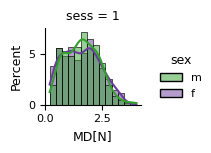

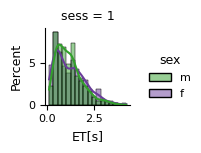

In [371]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC_natChord/analysis/natChord_chord.tsv')
D['MD'] = D['MD'].astype('float64')
D['ET'] = D['MT'].astype('float64')/1000 + D['RT'].astype('float64')/1000

sn_list = D.sn.unique()
male = [1,2,3,4,6]
female = [5,7,8,9,10]

D['sex'] = np.where(D['sn'].isin(female), 'f', 'm')

# distribution plot male vs female:
plt.rcParams.update({
    'font.size': 9,                 # Default text size
    'axes.titlesize': 9,            # Title size
    'axes.labelsize': 9,            # Axis label size
    'xtick.labelsize': 8,           # X-tick label size
    'ytick.labelsize': 8,           # Y-tick label size
    'legend.fontsize': 8,           # Legend font size
    'figure.titlesize': 9           # Figure title size
})

cmap = plt.get_cmap('Paired')
sns.displot(data=D, x="MD", hue="sex", col='sess', kde=True, stat='percent', height=1.6, palette=[mcolors.to_hex(cmap(3)), mcolors.to_hex(cmap(9))])
plt.xlabel('MD[N]')
plt.savefig(f'/Users/alighavampour/Desktop/Projects/EFC1/figures/efc3_MD_mf.pdf')

cmap = plt.get_cmap('Paired')
sns.displot(data=D, x="ET", hue="sex", col='sess', kde=True, stat='percent', height=1.6, palette=[mcolors.to_hex(cmap(3)), mcolors.to_hex(cmap(9))])
plt.xlabel('ET[s]')
plt.savefig(f'/Users/alighavampour/Desktop/Projects/EFC1/figures/efc3_ET_mf.pdf')

# average across chords:
# df_gp = D.groupby(['sn','sess'], as_index=False).agg({
#     'MD': 'mean',
#     'ET': 'mean',
#     'sex': 'first'
# })
# for sess in [1,2,3,4]:
#     male_MD = df_gp['MD'][(df_gp.sess==sess) & (df_gp.sex=='m')]
#     female_MD = df_gp['MD'][(df_gp.sess==sess) & (df_gp.sex=='f')]
#     male_ET = df_gp['ET'][(df_gp.sess==sess) & (df_gp.sex=='m')]
#     female_ET = df_gp['ET'][(df_gp.sess==sess) & (df_gp.sex=='f')]

#     # t-test:
#     res = ttest_ind(male_MD,female_MD, equal_var=True)
#     print(f'MD, sess{sess}, t={res.statistic:.2f}, p={res.pvalue:.2f}')

#     res = ttest_ind(male_ET,female_ET, equal_var=True)
#     print(f'ET, sess{sess}, t={res.statistic:.2f}, p={res.pvalue:.2f}')


## extension vs flexion difficulty

### flex ext symmetry

/var/folders/5y/1pn48fgn7yb77gc17h_5jms80000gp/T/ipykernel_3787/3986536387.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(32)+1)


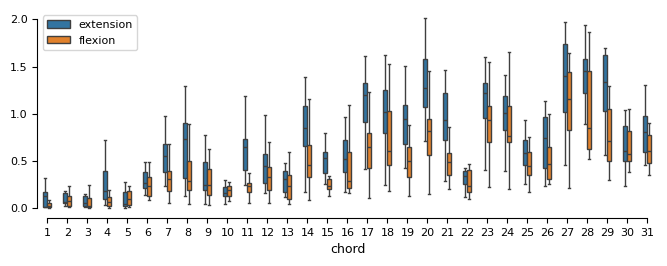

In [46]:
# load the data:
D = pd.read_table('/Users/alighavampour/Desktop/Projects/EFC1/analysis/efc1_chord.tsv')
D = D[D.sess>=3]

D['MD'] = D['MD'].astype('float64')
D['ET'] = D['ET'].astype('float64')/1000

# average across sessions:
df_gp = D.groupby(['sn','chordID'], as_index=False).agg({
    'MD': 'mean',
    'ET': 'mean',
})
# compare symmetry flexion and extension:
chords_unique = np.unique(df_gp['chordID'])
ext_only = [chords_unique[i] for i, x in enumerate(chords_unique) if (set(str(x)) == {'1','9'} or set(str(x)) == {'1'})]
ext_only = [19999, 91999, 99199, 99919, 99991,
            11999, 19199, 19919, 19991, 91199, 91919, 91991, 99119, 99191, 99911,
            11199, 11919, 11991, 19119, 19191, 19911, 91119, 91191, 91911, 99111,
            11119, 11191, 11911, 19111, 91111,
            11111]
MD = []
group = []
flex_ext = []
for i, chord in enumerate(ext_only):
    tmp = df_gp[df_gp['chordID'] == chord]
    MD.extend(tmp['MD'].values.flatten())
    group.extend(np.repeat(i, len(tmp)))
    flex_ext.extend(np.repeat('extension', len(tmp)))
    
    # flexion symmetry of chord:
    chord_sym = int(str(chord).replace('1', '2'))
    tmp = df_gp[df_gp['chordID'] == chord_sym]
    MD.extend(tmp['MD'].values.flatten())
    group.extend(np.repeat(i, len(tmp)))
    flex_ext.extend(np.repeat('flexion', len(tmp)))


# distribution plot male vs female:
plt.rcParams.update({
    'font.size': 9,                 # Default text size
    'axes.titlesize': 9,            # Title size
    'axes.labelsize': 9,            # Axis label size
    'xtick.labelsize': 8,           # X-tick label size
    'ytick.labelsize': 8,           # Y-tick label size
    'legend.fontsize': 8,           # Legend font size
    'figure.titlesize': 9           # Figure title size
})

fig, ax = plt.subplots(figsize=(8, 2.7))
sns.boxplot(data=None, x=group, y=MD, hue=flex_ext, width=0.4, fliersize=0)

plt.xlabel('chord')
plt.ylim((-0.1,2.1))
ax.set_xticklabels(np.arange(32)+1)
ax.set_yticks([0, 0.5, 1, 1.5, 2])

xlim = ax.get_xlim()
ylim = ax.get_ylim()
sns.despine(ax=ax)
# Set the bounds of the remaining spines to match the data limits
ax.spines['left'].set_bounds(0, 2)
ax.spines['bottom'].set_bounds(0,30)
plt.savefig('/Users/alighavampour/Desktop/Projects/EFC1/figures/efc1_MD_symmetry.pdf', bbox_inches='tight')